In [27]:
import sys
import network as netfn
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
import admin_functions as adfn
import networkx as nx
#plt.style.use('dark_background')
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [2]:
# Create coordlist 
#If realcoord file has 5 columns & kcoord has 3 = ALREADY CLUSTERED
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
coordlist = sorted(glob.glob('*realcoord.npy'))
tracelist = sorted(glob.glob('*_realtrace.npy'))
ktrace = sorted(glob.glob('*ktrace.npy'))
kcoord = sorted(glob.glob('*kcoord.npy'))

# Node parcellation

In [122]:
# Run k-mean clustering on x-y coordinates to get spatially contiguous seed clusters
#Re-saves coordinate file with spacek labels as new columns (realcoord, 4columns: x,y,z,spacek labels)
#-----------------------------------------------------------------------------------------
kmeans = netfn.spacek(coordlist, Fdrop, experiment, mcc = 500)

Clustering fish 1 of 3
Clustering fish 2 of 3
Clustering fish 3 of 3


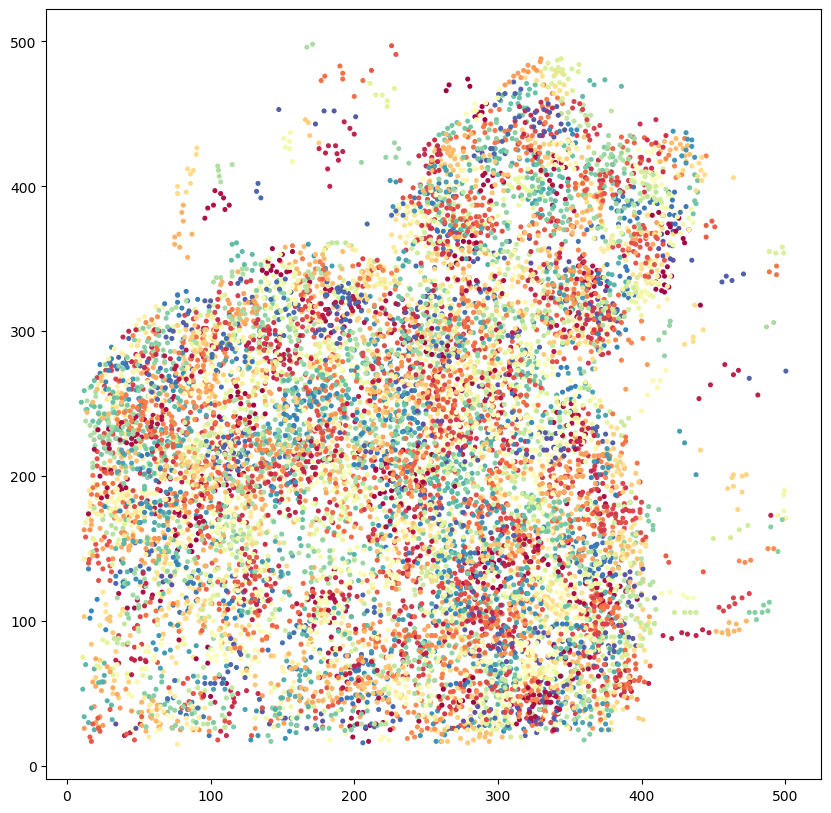

In [162]:
# Plot an illustrative example
#----------------------------------------------------------------------------------------
fish = 4
# Pull out the data from fish structure
#----------------------------------------------------------------------------------------
cs = np.load(coordlist[fish])
x = cs[:,0]
y = cs[:,1]
# Actual plotting routines
#----------------------------------------------------------------------------------------
plt.figure(figsize = (10,10))
plt.scatter(x, y, s = 7, c = cs[:,3],  cmap = 'Spectral', alpha = 1)
plt.show()

## Functional clusters

In [116]:
np.load(tracelist[1]).shape

(8350, 4914)

In [117]:
np.load(coordlist[1]).shape

(9755, 4)

In [132]:
# Calculate average traces within clusters
# Saves - array of traces for each spatial cluster (ktrace) and 
# mean coords for each cluster(kcoords, 3columns: x,y,z)
#run - define whether this is the first time doing average or second
#------------------------------------------------------------------------------
Fktrace, Fkcoord  = netfn.average(Fdrop, experiment, tracelist, coordlist)

Calculating fish 1 of 3
Calculating fish 2 of 3
Calculating fish 3 of 3


In [83]:
Fktrace

NameError: name 'Fktrace' is not defined

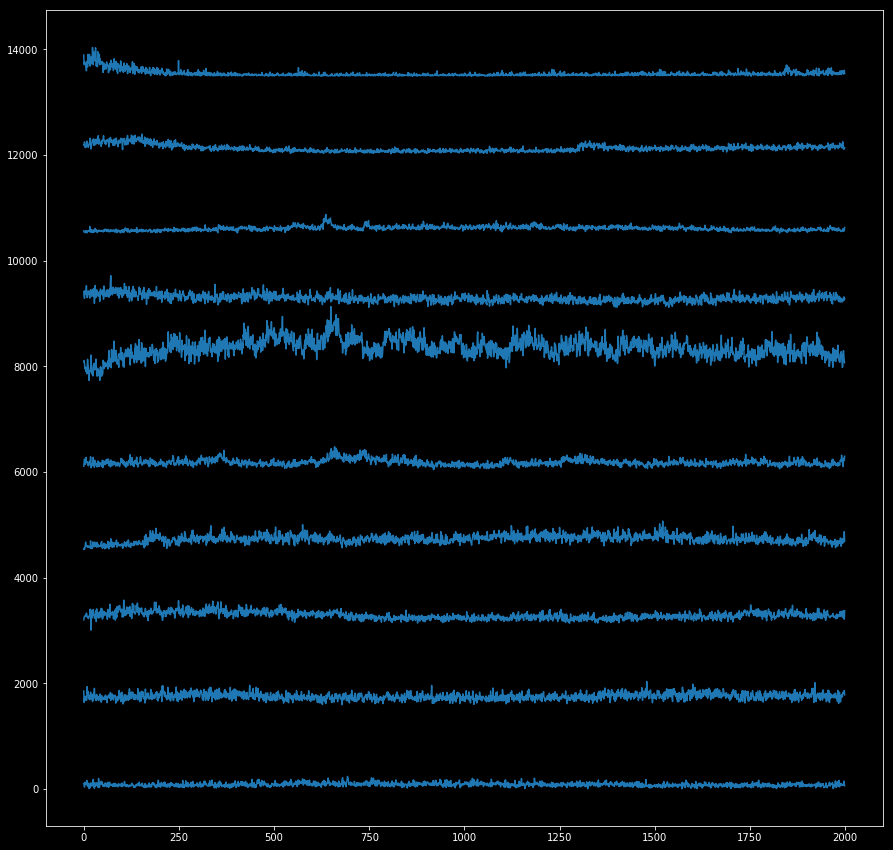

In [337]:
# Plot an example traces
#----------------------------------------------------------------------------------------------
nplt  = 10
fish = 2
d     = np.load(ktrace[0])[:nplt,:2000]
cm    = plt.get_cmap("Paired")

plt.figure(figsize=(15,15))
for i in range(nplt):
    plt.plot(d[i,:] + 1500*i, c=cm(1))

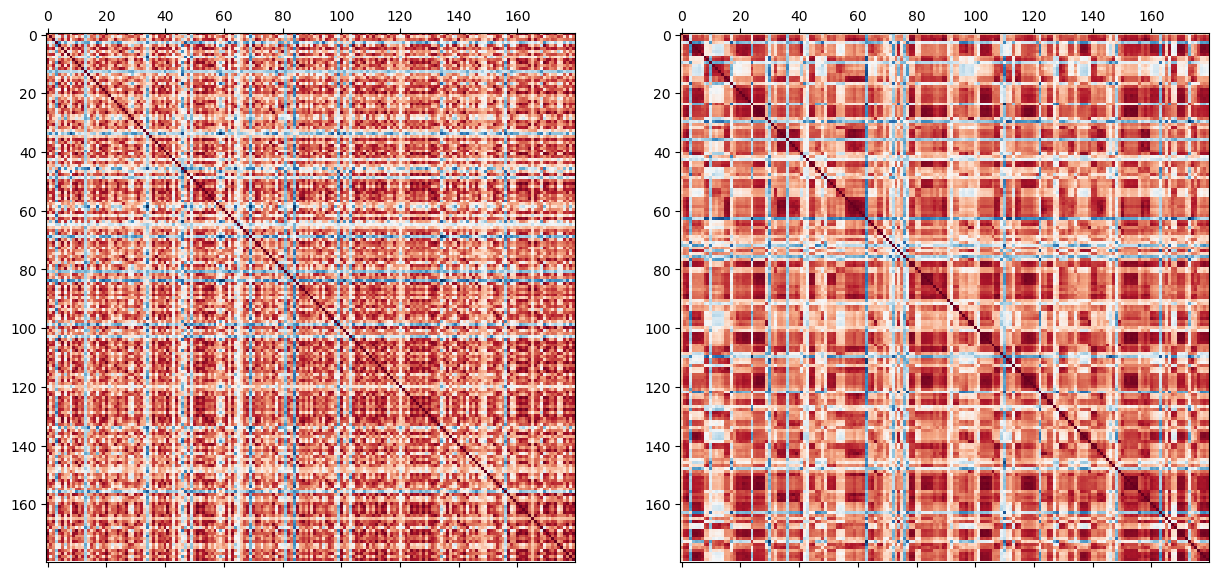

In [235]:
# Plot correlation spatial clusters and functional/spatial clusters
#---------------------------------------------------------------------------------
fish = 0 
cor = np.corrcoef(np.load(ktrace[fish])) #correlation matrix of each spatial cluster
kmeans   = KMeans(n_clusters=100, random_state=0).fit(cor) #spatial clusters clustered on functional correlation
kl       = kmeans.labels_ #new labels for functional clusters
klstd   = np.argsort(kl) #returns indices that would sort each spatial cluster into new cluster
scor    = cor[klstd,:]
scor    = scor[:,klstd] #re-order correlation matrix
fig, ax = plt.subplots(1,2, figsize= (15,10))
ax[0].matshow(cor, cmap='RdBu_r')
ax[1].matshow(scor, cmap='RdBu_r')
plt.show()

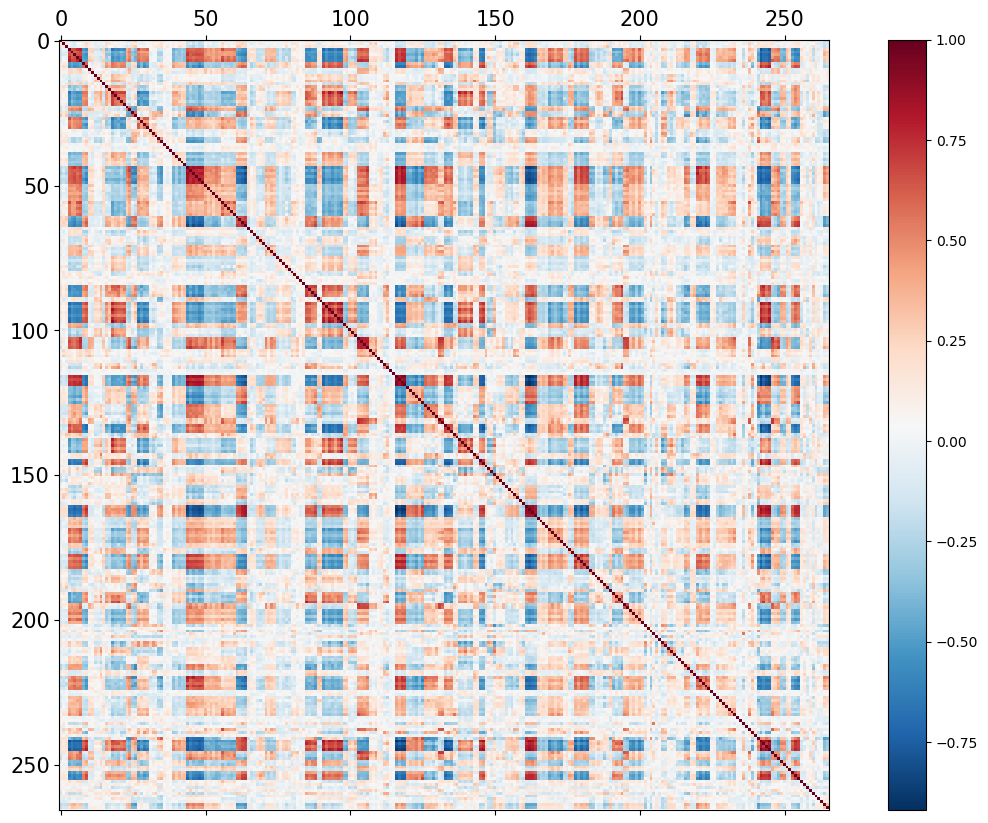

In [239]:
# Plot correlation spatial clusters and functional/spatial clusters
#---------------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
fish = 0
cor = np.corrcoef(np.load(ktrace[fish])) #correlation matrix of each spatial cluster
kmeans   = KMeans(n_clusters=100, random_state=0).fit(cor) #spatial clusters clustered on functional correlation
kl       = kmeans.labels_ #new labels for functional clusters
klstd   = np.argsort(kl) #returns indices that would sort each spatial cluster into new cluster
scor    = cor[klstd,:]
scor    = scor[:,klstd] #re-order correlation matrix
fig, ax = plt.subplots(figsize= (15,10))
dotplot = ax.matshow(scor, cmap='RdBu_r')

ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize=15)
fig.colorbar(dotplot, ax = None)

os.chdir(Ffig)
plt.savefig('cbarnodematrix.png', transparent = True)
plt.show()

In [141]:
np.load(ktrace[2]).shape

(17, 4914)

In [143]:
#Run K-means clustering on correlation matrix
#Re-saves - kcoord file by appending functional cluster labels 
#(4columns: x,y,z, correlation cluster label)
#-----------------------------------------------------------
Fkcorr = netfn.funck(Fdrop, experiment, ktrace, kcoord)

Clustering fish 1 of 3
Clustering fish 2 of 3
Clustering fish 3 of 3


In [146]:
kcoord

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_kcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_kcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_kcoord.npy']

In [145]:
# Split up clusters according to spatial parameters
#Re-saves - kcoord file by appending functional cluster labels
#(5columns: x,y,z, corr cluster label, re-assigned corr cluster label)
#-----------------------------------------------------------------------
for i in range(len(kcoord)):
    kread = np.load(kcoord[i]) 
    nkl = netfn.divconq(kcoord, i, Fdrop, experiment, kcoord[i], kread)
    newclusterar = np.column_stack((kread[:,:4],nkl))
    np.save(Fdrop + 'Project/' + experiment + os.sep + kcoord[i][:kcoord[i].find('run')+6] + '_kcoord.npy', newclusterar)

Clustered fish 3 of 3


In [147]:
#Re-average traces and coords according to new parcel labels
#Re-saves ktrace and kcoord file (3 columns = x,y,z) and appends final label values to realcoord file (5 columns)
#-----------------------------------------------------------------------------
for y in range(len(kcoord)):
    cs = np.load(coordlist[y])[:,:4] #single neuron coordinates
    ks = np.load(kcoord[y])[:,4] #final cluster labels
    labelvec = np.zeros(cs.shape[0])
    for i in range(cs.shape[0]):
        labelvec[i] = np.int(ks[np.int(cs[:,3][i])])
    finalcoord = np.column_stack((cs,labelvec))
    np.save(Fdrop + 'Project/' + experiment + os.sep + coordlist[y][:coordlist[y].find('run')+6] + '_' + 'realcoord.npy', finalcoord)
Fktrace, Fkcoord  = netfn.average(Fdrop, experiment, tracelist, coordlist = coordlist)

Calculating fish 1 of 3
Calculating fish 2 of 3
Calculating fish 3 of 3


In [164]:
kcoord

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_kcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_kcoord.npy',
 'PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_kcoord.npy']

In [172]:
np.load(kcoord[0])[11]

array([ 78.16388889, 101.86388889,   1.83611111])

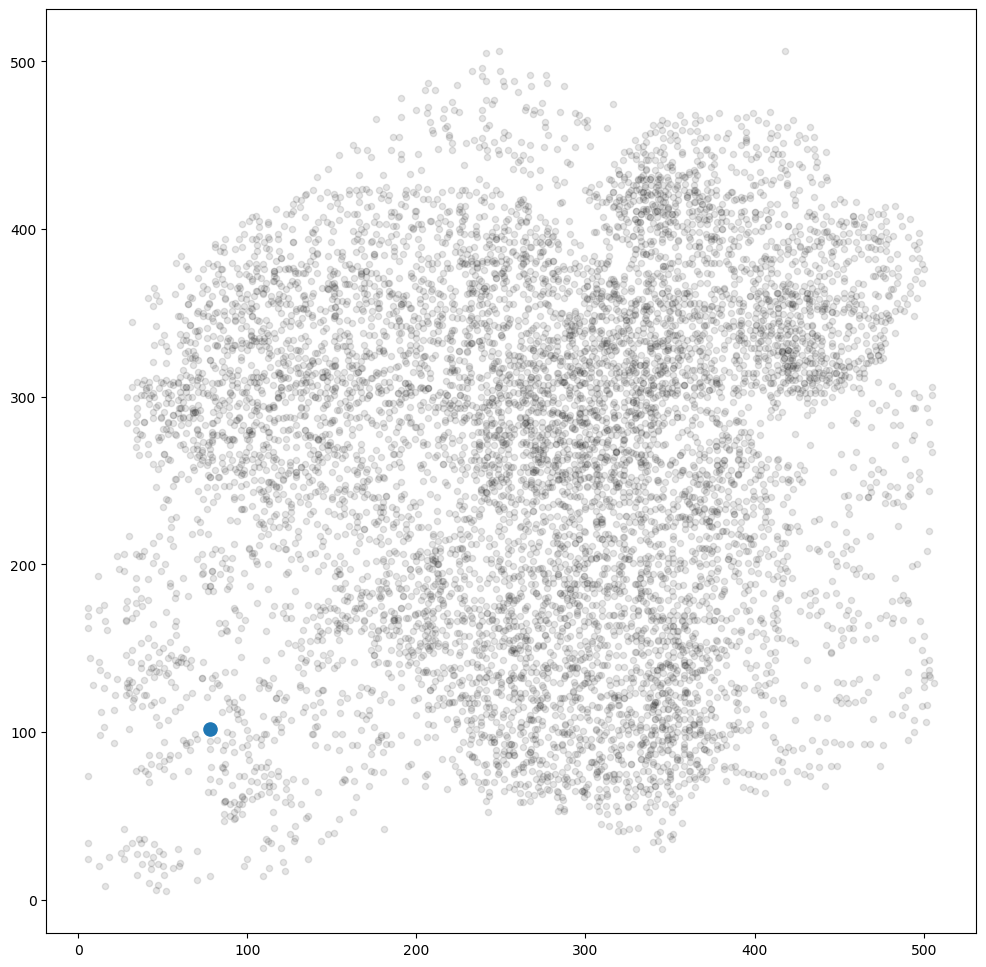

In [177]:
# PLOT - final nodes
#----------------------------------------------------------------------------------------
fish = 0
# Pull out the data from fish structure
#----------------------------------------------------------------------------------------
cs = np.load(kcoord[fish])
cs1 = np.load(coordlist[fish])
x = cs[:,0]
x1 = cs1[:,0]
y = cs[:,1]
y1 = cs1[:,1]


# Actual plotting routines
#----------------------------------------------------------------------------------------
plt.figure(figsize = (12,12))
plt.scatter(x[11], y[11], s = 90, cmap = 'flag', alpha = 1)
plt.scatter(x1, y1, s = 20,  c = 'k', alpha = 0.1)
plt.show()

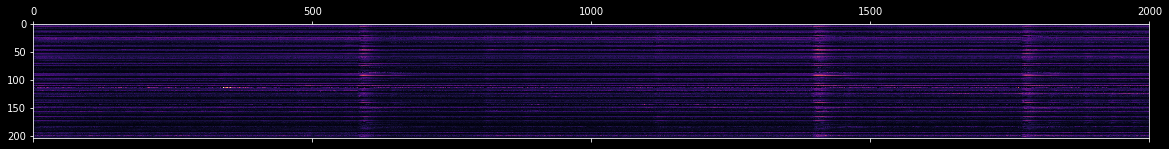

In [256]:
# Plot example module traces
#---------------------------------------------------------------------------------------
fish = 5
fig, ax = plt.subplots(1, figsize= (20,5))
ax.matshow(np.load(ktrace[fish])[:,:2000], cmap='magma')
plt.show()

# Module detection

In [ ]:
# Convert matrix into NetworkX Graph object to run module detection
#-------------------------------------------------------------------------------------
cor        = np.corrcoef(Fish["Parcels"]["Data"]); 
cor[cor < 0] = 0
G          = nx.from_numpy_array(cor)
partition  = community.best_partition(G)
M          = {"Label":np.asarray(partition.values())}
Fish.update({"Modules":M})

# Motifs

In [13]:
# Create coordlist 
#If realcoord file has 5 columns & kcoord has 3 = ALREADY CLUSTERED
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blist = sorted(glob.glob('*BLN*cutrealtrace*'))
p5list = sorted(glob.glob('*PTZ05*cutrealtrace*'))
p20list = sorted(glob.glob('*PTZ20*cutrealtrace*'))
p20list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy']

### Edge/Cycle density

In [3]:
# Create coordlist 
#If realcoord file has 5 columns & kcoord has 3 = ALREADY CLUSTERED
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blist = sorted(glob.glob('*BLN*-cycles*'))
p5list = sorted(glob.glob('*PTZ05*cycles*'))
p20list = sorted(glob.glob('*PTZ20*cycles*'))
blist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-cycles.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-cycles.npy']

In [43]:
# Create coordlist 
#If realcoord file has 5 columns & kcoord has 3 = ALREADY CLUSTERED
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
prac = sorted(glob.glob('*dyn*-cycles*'))
prac

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-dynamic-cycles.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01-dynamic-cycles.npy']

In [82]:
t

119

In [83]:
## SLIDING WINDOW

steps = 10
listlist = [blist,p5list, p20list]

for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        count=0
        trace = np.load(listlist[i][e])
        window = adfn.window(120, trace.shape[1])
        tot_list = list(range(window[1]))
        for o in range(window[1]):
            cut_trace = trace[:,count:count+window[0]]
            count+=window[0]
            no_E, cycn,cycd, cyclen = list(range(steps)),list(range(steps)),list(range(steps)),list(range(steps))
            index = 0
            comblist = list(range(4))

            for cutoff in range(1, steps+1):

                # Network construction
                #=====================================================================
                # Calculate correlation coefficient
                #---------------------------------------------------------------------
                A = np.corrcoef(cut_trace) #correlation matrix of ktraces
                np.fill_diagonal(A, 0) #fills diagonal with 0s (removes self correlation)

                # Binarise according to z cut off (zscore?)
                #---------------------------------------------------------------------
                bA = A > (cutoff / 10)

                # Generate Network x object GRAPH
                #---------------------------------------------------------------------
                G = nx.from_numpy_matrix(bA) #generates graph connected edges between nodes only above threshold correlation

                # Cycle parameters
                #=====================================================================
                cycs = nx.algorithms.cycle_basis(G) #returns list of complete cycles in data
                cycn[index] = len(cycs)
                no_E[index] = G.number_of_edges() #how many edges in network
                if no_E[index] > 0: cycd[index] = len(cycs) / no_E[index]
                else:        cycd[index] = 0

                cyc_vec = np.zeros(len(cycs))
                for t in range(len(cycs)):
                    cyc_vec[t] = len(cycs[t])
                cyclen[index] = np.unique(cyc_vec, return_counts=True)

                index+=1

            comblist[0] = no_E
            comblist[1] = cycn
            comblist[2] = cycd
            comblist[3] = cyclen
            tot_list[o] = comblist
            
        np.save(savepath + adfn.save_name(e, listlist[i]) + '-dynamic-cycles.npy', tot_list)
        print('Done fish ' + adfn.save_name(e, listlist[i])  + '  #' + str(e))
        


Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01  #0
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01  #1
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01  #2
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01  #3
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01  #4
Done fish PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01  #5
Done fish PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01  #6
Done fish PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01  #7
Done fish PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01  #8
Done fish PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01  #9
Done fish PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09  #10
Done fish PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01  #0
Done fish PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01  #1
Done fish PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01  #2
Done fish PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01  #3
Done fish PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01  

In [80]:
len(tot_list)

39

In [78]:
t

119

In [ ]:
steps = 10
listlist = [blist,p5list, p20list]

for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        trace = np.load(listlist[i][e])
        no_E, cycn,cycd, cyclen = list(range(steps)),list(range(steps)),list(range(steps)),list(range(steps))
        index = 0
        comblist, swlist = list(range(4)),list(range(3))
        
        for cutoff in range(1, steps+1):

            # Network construction
            #=====================================================================
            # Calculate correlation coefficient
            #---------------------------------------------------------------------
            A = np.corrcoef(trace) #correlation matrix of ktraces
            np.fill_diagonal(A, 0) #fills diagonal with 0s (removes self correlation)
    
            # Binarise according to z cut off (zscore?)
            #---------------------------------------------------------------------
            bA = A > (cutoff / 10)
    
            # Generate Network x object GRAPH
            #---------------------------------------------------------------------
            G = nx.from_numpy_matrix(bA) #generates graph connected edges between nodes only above threshold correlation

            # Cycle parameters
            #=====================================================================
            cycs = nx.algorithms.cycle_basis(G) #returns list of complete cycles in data
            cycn[index] = len(cycs)
            no_E[index] = G.number_of_edges() #how many edges in network
            if no_E[index] > 0: cycd[index] = len(cycs) / no_E[index]
            else:        cycd[index] = 0
            
            cyc_vec = np.zeros(len(cycs))
            for t in range(len(cycs)):
                cyc_vec[t] = len(cycs[t])
            cyclen[index] = np.unique(cyc_vec, return_counts=True)

            index+=1
        
        comblist[0] = no_E
        comblist[1] = cycn
        comblist[2] = cycd
        comblist[3] = cyclen
        np.save(savepath + adfn.save_name(e, listlist[i]) + '-cycles.npy', comblist)
        print('Done fish ' + adfn.save_name(e, listlist[i])  + '  #' + str(e))
        


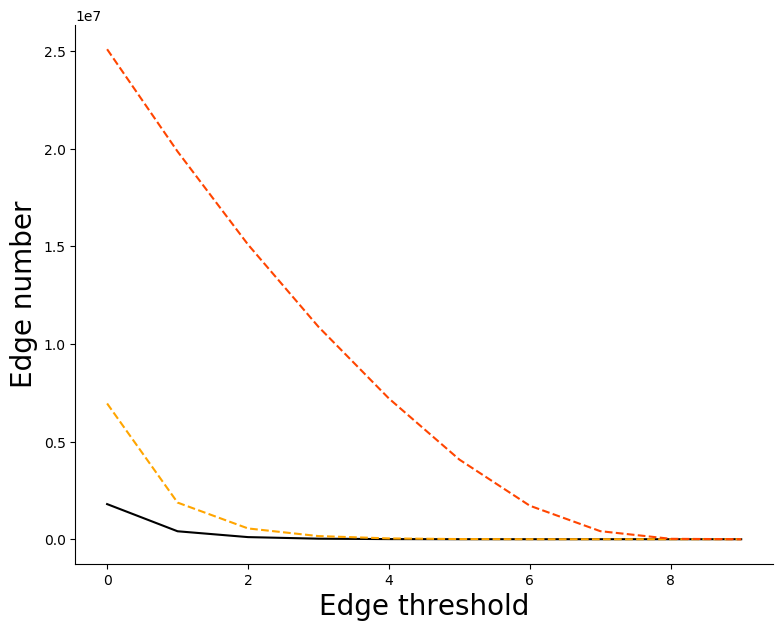

"for i in range(len(blist)):\n    fig, axarr = plt.subplots(figsize = (7,5))\n    for e in range(len(listlist)):\n        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)\n    axarr.set_ylabel('Edge number', size = '12')\n    axarr.set_xlabel('Edge threshold', size = '12')\n    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    axarr.spines['top'].set_visible(False)\n    axarr.spines['right'].set_visible(False)\n\nplt.show()"

In [6]:
#Plot edge number
import matplotlib
colors = ['black' ,'orange', 'orangered']
linestyle = ['-' ,'--', '--']
binvec = []
choose=0
listlist = [blist, p5list, p20list]

fig, axarr = plt.subplots(figsize = (9,7))
for i in range(len(listlist)):
    stack = np.load(listlist[i][0], allow_pickle=True)[choose]
    for e in range(len(listlist[i])-1):
        stack = np.vstack((stack, np.load(listlist[i][e+1], allow_pickle=True)[choose]))
    plt.plot(np.apply_along_axis(np.mean,0,stack),  color = colors[i], linestyle = linestyle[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('Edge number', size = '20')
axarr.set_xlabel('Edge threshold', size = '20')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

"""for i in range(len(blist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(listlist)):
        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)
    axarr.set_ylabel('Edge number', size = '12')
    axarr.set_xlabel('Edge threshold', size = '12')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)

plt.show()"""

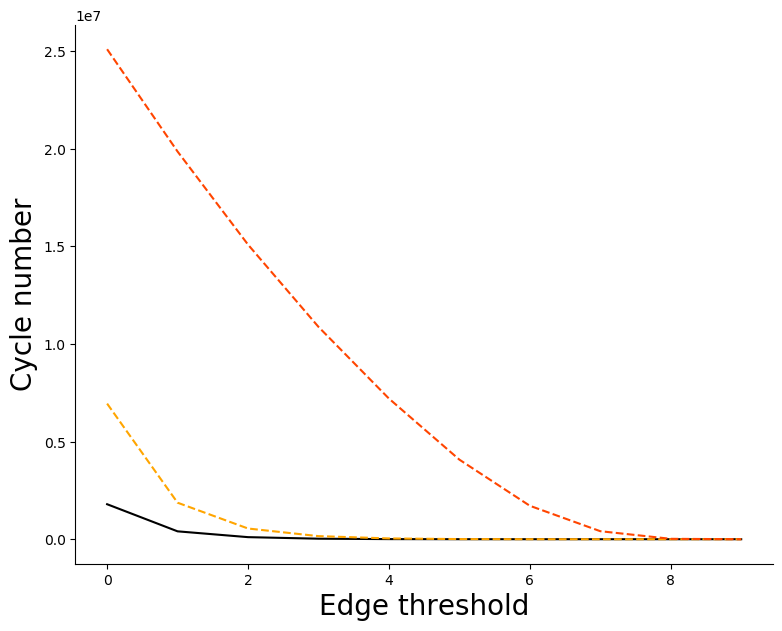

"for i in range(len(blist)):\n    fig, axarr = plt.subplots(figsize = (7,5))\n    for e in range(len(listlist)):\n        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)\n    axarr.set_ylabel('Cycle number', size = '13')\n    axarr.set_xlabel('Edge threshold', size = '13')\n    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    axarr.spines['top'].set_visible(False)\n    axarr.spines['right'].set_visible(False)\n\nplt.show()"

In [8]:
#Plot cycle number

import matplotlib
colors = ['black' ,'orange', 'orangered']
linestyle = ['-' ,'--', '--']
binvec = []
choose = 1
listlist = [blist, p5list, p20list]

fig, axarr = plt.subplots(figsize = (9,7))
for i in range(len(listlist)):
    stack = np.load(listlist[i][0], allow_pickle=True)[choose]
    for e in range(len(listlist[i])-1):
        stack = np.vstack((stack, np.load(listlist[i][e+1], allow_pickle=True)[choose]))
    plt.plot(np.apply_along_axis(np.mean,0,stack),  color = colors[i], linestyle = linestyle[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('Cycle number', size = '20')
axarr.set_xlabel('Edge threshold', size = '20')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


"""for i in range(len(blist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(listlist)):
        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)
    axarr.set_ylabel('Cycle number', size = '13')
    axarr.set_xlabel('Edge threshold', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)

plt.show()"""

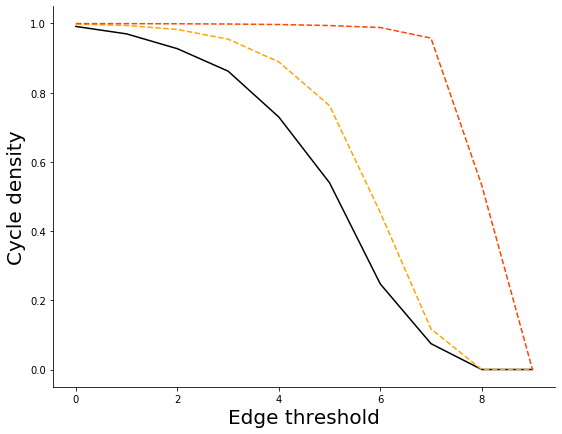

"for i in range(len(blist)):\n    fig, axarr = plt.subplots(figsize = (7,5))\n    for e in range(len(listlist)):\n        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)\n    axarr.set_ylabel('Cycle density', size = '13')\n    axarr.set_xlabel('Edge threshold', size = '13')\n    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    axarr.spines['top'].set_visible(False)\n    axarr.spines['right'].set_visible(False)\n\nplt.show()"

In [126]:
#Plot cycle density
import matplotlib
colors = ['black' ,'orange', 'orangered']
linestyle = ['-' ,'--', '--']
binvec = []
listlist = [blist, p5list, p20list]
choose = 2


fig, axarr = plt.subplots(figsize = (9,7))
for i in range(len(listlist)):
    stack = np.load(listlist[i][0], allow_pickle=True)[choose]
    for e in range(len(listlist[i])-1):
        stack = np.vstack((stack, np.load(listlist[i][e+1], allow_pickle=True)[choose]))
    plt.plot(np.apply_along_axis(np.mean,0,stack),  color = colors[i], linestyle = linestyle[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('Cycle density', size = '20')
axarr.set_xlabel('Edge threshold', size = '20')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

"""for i in range(len(blist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(listlist)):
        plt.plot(np.load(listlist[e][i], allow_pickle=True)[choose],  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)
    axarr.set_ylabel('Cycle density', size = '13')
    axarr.set_xlabel('Edge threshold', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)

plt.show()"""

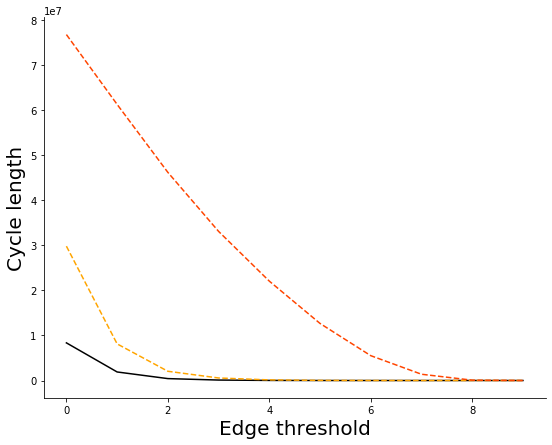

"for i in range(len(blist)):\n    fig, axarr = plt.subplots(figsize = (7,5))\n    for e in range(len(listlist)):\n        current = np.load(listlist[e][i], allow_pickle=True)[choose]\n        cyc_nodes = list(range(len(current)))\n        for t in range(len(current)):\n            multi = np.multiply(current[t][0],current[t][1])\n            cyc_nodes[t] =  np.sum(multi)\n        plt.plot(cyc_nodes ,  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)\n    axarr.set_ylabel('Cycle length', size = '13')\n    axarr.set_xlabel('Edge threshold', size = '13')\n    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    axarr.spines['top'].set_visible(False)\n    axarr.spines['right'].set_visible(False)\nplt.show()"

In [127]:
#Plot total cycle length

import matplotlib
colors = ['black' ,'orange', 'orangered']
linestyle = ['-' ,'--', '--']
binvec = []
listlist = [blist, p5list, p20list]
choose = 3

fig, axarr = plt.subplots(figsize = (9,7))
stack = np.zeros((11,10))
for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        current = np.load(listlist[i][e], allow_pickle=True)[choose]
        cyc_nodes = list(range(len(current)))
        for t in range(len(current)):
            multi = np.multiply(current[t][0],current[t][1])
            cyc_nodes[t] =  np.sum(multi)
        stack[e] = cyc_nodes
    plt.plot(np.apply_along_axis(np.mean,0,stack),  color = colors[i], linestyle = linestyle[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('Cycle length', size = '20')
axarr.set_xlabel('Edge threshold', size = '20')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


"""for i in range(len(blist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(listlist)):
        current = np.load(listlist[e][i], allow_pickle=True)[choose]
        cyc_nodes = list(range(len(current)))
        for t in range(len(current)):
            multi = np.multiply(current[t][0],current[t][1])
            cyc_nodes[t] =  np.sum(multi)
        plt.plot(cyc_nodes ,  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)
    axarr.set_ylabel('Cycle length', size = '13')
    axarr.set_xlabel('Edge threshold', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
plt.show()"""

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


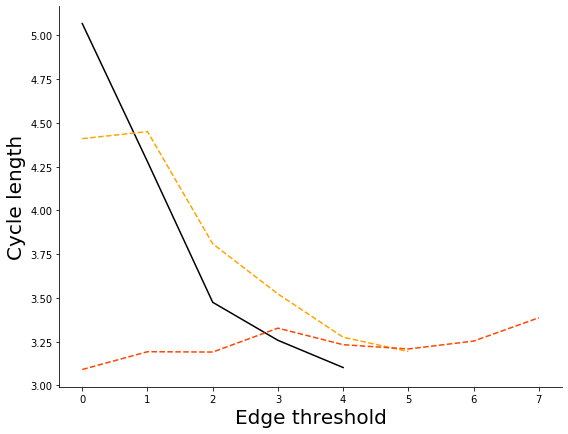

"for i in range(len(blist)):\n    fig, axarr = plt.subplots(figsize = (7,5))\n    for e in range(len(listlist)):\n        current = np.load(listlist[e][i], allow_pickle=True)[choose]\n        cyc_n = np.load(listlist[e][i], allow_pickle=True)[1]\n        \n        mean_cyc_nodes = list(range(len(current)))\n        for t in range(len(current)):\n            multi = np.multiply(current[t][0],current[t][1])\n            cyc_nodes =  np.sum(multi)\n            mean_cyc_nodes[t] = (cyc_nodes/cyc_n[t])\n        plt.plot(mean_cyc_nodes ,  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)\n    axarr.set_ylabel('Cycle length', size = '13')\n    axarr.set_xlabel('Edge threshold', size = '13')\n    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    axarr.spines['top'].set_visible(False)\n    axarr.spines['right'].set_visible(False)\nplt.show()"

In [128]:
#Plot total cycle length

import matplotlib

colors = ['black' ,'orange', 'orangered']
linestyle = ['-' ,'--', '--']
binvec = []
listlist = [blist, p5list, p20list]
choose = 3

fig, axarr = plt.subplots(figsize = (9,7))
stack = np.zeros((11,10))
for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        current = np.load(listlist[i][e], allow_pickle=True)[choose]
        cyc_n = np.load(listlist[i][e], allow_pickle=True)[1]
        mean_cyc_nodes = list(range(len(current)))
        for t in range(len(current)):
            multi = np.multiply(current[t][0],current[t][1])
            cyc_nodes =  np.sum(multi)
            mean_cyc_nodes[t] = (cyc_nodes/cyc_n[t])
        stack[e] = mean_cyc_nodes
    plt.plot(np.apply_along_axis(np.mean,0,stack),  color = colors[i], linestyle = linestyle[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('Cycle length', size = '20')
axarr.set_xlabel('Edge threshold', size = '20')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


"""for i in range(len(blist)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(listlist)):
        current = np.load(listlist[e][i], allow_pickle=True)[choose]
        cyc_n = np.load(listlist[e][i], allow_pickle=True)[1]
        
        mean_cyc_nodes = list(range(len(current)))
        for t in range(len(current)):
            multi = np.multiply(current[t][0],current[t][1])
            cyc_nodes =  np.sum(multi)
            mean_cyc_nodes[t] = (cyc_nodes/cyc_n[t])
        plt.plot(mean_cyc_nodes ,  color = colors[e], linestyle = linestyle[e], linewidth = 1.5, markersize = 1, alpha = 1)
    axarr.set_ylabel('Cycle length', size = '13')
    axarr.set_xlabel('Edge threshold', size = '13')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
plt.show()"""

### Branching ratio

In [18]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [19]:
import pandas as pd
all_list = [blnbranchlist, p5branchlist, p20branchlist]
blist = adfn.list_of_list(3,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))


fli = list(range(11))
flist=[]
for i in range(11):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
branchdic = {
  "branch ratio": np.append(np.append(blist[0], blist[1]),blist[2]), "condition": np.append(np.append(adfn.repeat_list('baseline',11),adfn.repeat_list('PTZ 5mM',11)),adfn.repeat_list('PTZ 20mM',11)), "Fish": flist}
branchdf = pd.DataFrame(branchdic)

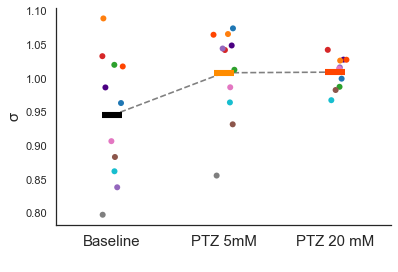

In [20]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['black','darkorange','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="condition", y="branch ratio", data = branchdf, hue = 'condition', palette = colors2, join=True, ci=0, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish', palette = colors1, size = 6, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'PTZ 5mM', 'PTZ 20 mM'], size = 15)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.show()

# Small worldness
* Characteristic path length (low)
* Clustering coefficient (high)

In [42]:
# Create coordlist 
#If realcoord file has 5 columns & kcoord has 3 = ALREADY CLUSTERED
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blist = sorted(glob.glob('*BLN*cutrealtrace*'))
p5list = sorted(glob.glob('*PTZ05*cutrealtrace*'))
p20list = sorted(glob.glob('*PTZ20*cutrealtrace*'))
p20list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_cutrealtrace.npy']

In [ ]:
steps = 10
listlist = [blist,p5list]
cutoff_list = [cutoff for cutoff in range(1, steps+1)]
for i in range(len(listlist)):
    for e in range(len(listlist[i])):
        trace = np.load(listlist[i][e])
        paramlist = [trace]
        output = adfn.parallel(2, cutoff_list, swi_steps, paramlist)
        np.save(savepath + adfn.save_name(e, listlist[i]) + '-smallworld.npy', output)
        print('Done fish ' + adfn.save_name(e, listlist[i])  + '  #' + str(e))

In [43]:
def swi_steps(cutoff, trace):
    # Small world parameteres
    #=====================================================================
    pl,cc = [],[]
    A = np.corrcoef(trace) #correlation matrix of ktraces
    np.fill_diagonal(A, 0) #fills diagonal with 0s (removes self correlation)

    # Binarise according to z cut off (zscore?)
    #---------------------------------------------------------------------
    bA = A > (cutoff / 10)

    # Generate Network x object GRAPH
    #---------------------------------------------------------------------
    G = nx.from_numpy_matrix(bA) #generates graph connected edges between nodes only above threshold correlation
            
    cc = nx.average_clustering(G)

    conn_comp = sorted(nx.connected_components(G), key=len, reverse=True)
    connected_list = []
    count=0
    for f in range(len(conn_comp)):
        if len(conn_comp[f]) > 100:
            count +=1
    for C in (G.subgraph(c).copy() for c in conn_comp[:count]):
        pl = nx.average_shortest_path_length(C)

    #sigma[index] = nx.algorithms.smallworld.sigma(G)
    #omega[index] = nx.algorithms.smallworld.omega(G)
    return(cc,pl)